In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl 
from matplotlib import pyplot as plt
from matplotlib.pyplot import get_cmap
from matplotlib.colors import LogNorm
import sys 
sys.path.append('../../modules/')
import matplotlib_config as mconf
colorI, colorII, colorIII = mconf.set_standard_layout()

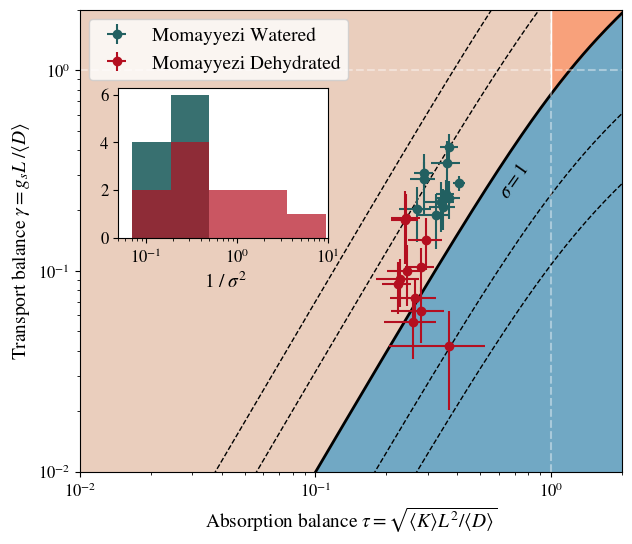

In [2]:
fig = plt.figure(figsize=(7, 6))
chi_ = 0.1
xmin, xmax = 0.01, 100
alpha = 0.6

taus = np.exp(np.linspace(np.log(xmin), np.log(xmax), 400))
borders = lambda taus, sigma: sigma*taus*np.tanh(taus)

# COLORS
point_colors = [mconf.hex2rgb('226061'), mconf.hex2rgb('B40F20')]

# shading
plt.fill_between(taus, borders(taus, 1), xmin, color=colorI)
plt.fill_between(taus[taus <= 1], xmax, borders(taus[taus <= 1], 1), color=colorII)
plt.fill_between(taus[taus >= 1], xmax, borders(taus[taus >= 1], 1), color=colorIII)
# lines
plt.plot(taus, borders(taus, 1), color='black', linestyle='-', linewidth=2)
plt.plot(taus, borders(taus, np.sqrt(50)), color='black', linestyle='--', linewidth=1)
plt.plot(taus, borders(taus, np.sqrt(10)), color='black', linestyle='--', linewidth=1)
plt.plot(taus, borders(taus, 1/np.sqrt(10)), color='black', linestyle='--', linewidth=1)
plt.plot(taus, borders(taus, 1/np.sqrt(50)), color='black', linestyle='--', linewidth=1)
plt.text(0.58, 0.23, r'$\sigma = 1$', color='black', fontweight='bold', rotation=55)

# load dfMomayyezi to plot the data points
dfMomayyeziW = pd.read_csv('../../data/saved_data/Momayyezi2022_watered.csv', sep=';', decimal=',')
dfMomayyeziDH = pd.read_csv('../../data/saved_data/Momayyezi2022_dehydrated.csv', sep=';', decimal=',')

# plot data points 
for df, color, label in zip([dfMomayyeziW, dfMomayyeziDH], point_colors, ['Momayyezi Watered', 'Momayyezi Dehydrated']):
    plt.errorbar(df['tau'], df['gamma'], xerr=[df['dtau_low'], df['dtau_high']], yerr=[df['dgamma_low'], df['dgamma_high']], fmt='o', color=color, label=label, alpha=1)

plt.xlabel(r'Absorption balance $\tau = \sqrt{\langle K \rangle L^2 / \langle D \rangle}$')
plt.ylabel(r'Transport balance $\gamma = g_s L \; / \langle D \rangle$')
plt.plot([1, 1], [xmin, xmax], color='white', linestyle='--', alpha=0.4)
plt.plot([xmin, xmax], [1, 1],  color='white', linestyle='--', alpha=0.4)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01, 2)
plt.ylim(0.01, 2)
plt.legend(loc='upper left')

def calculate_sigma(df):
    tau = df['tau'] 
    gamma = df['gamma']
    return gamma / (tau * np.tanh(tau))

sigmaW = 1/calculate_sigma(dfMomayyeziW)**2
sigmaDH = 1/calculate_sigma(dfMomayyeziDH)**2

# Create an inset plot for histogram of tau values with logarithmic binning
log_bins = np.logspace(np.log10(min(sigmaW.min(), sigmaDH.min())), 
                       np.log10(max(sigmaW.max(), sigmaDH.max())), 
                       6)  
inset_ax = fig.add_axes([0.18, 0.50, 0.3, 0.25])  # [x, y, width, height] in figure coordinates

inset_ax.hist(sigmaW, bins=log_bins, color=point_colors[0], alpha=0.9)
inset_ax.hist(sigmaDH, bins=log_bins, color=point_colors[1], alpha=0.7)
inset_ax.set_xscale('log')
inset_ax.set_xlim(0.05, 10)
inset_ax.set_xlabel(r' $1 \; / \;\sigma^2$')

plt.savefig('../vectorgraphics/figure2F.svg')
plt.show()
